In [2]:
import os
import sys
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import cv2

In [3]:
from keras.models import load_model
model=load_model('facial_avg.h5')

In [4]:
emotion_label={0:'Angry',1:'Disgusted',2:'Frightened',3:'Happy',4:'Sad',5:'Surprised',6:'Neutral'}

In [5]:
def facecrop(image):
    faceCasc='haarcascade_frontalface_default.xml'
    cascade=cv2.CascadeClassifier(faceCasc)
    grayimg=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    face=cascade.detectMultiScale(grayimg,scaleFactor=1.02,minNeighbors=5)
    crops=[]
    for x,y,w,h in face:
        cropped=image[y:y+h, x:x+w]
        crops.append(cropped)
    return crops

In [6]:
from keras.preprocessing import image
def resizeImage(ip):
    face=cv2.resize(ip,(48,48))
    face=cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)
    face=face/255
    face=face.reshape(48,48,1)
    face=np.expand_dims(face, axis=0)
    return face

In [7]:
def displayGraph(emotions):
    happy=(100*emotions.count('Happy'))/len(emotions)
    angry=(100*emotions.count('Angry'))/len(emotions)
    disgust=(100*emotions.count('Disgusted'))/len(emotions)
    fear=(100*emotions.count('Frightened'))/len(emotions)
    sad=(100*emotions.count('Sad'))/len(emotions)
    surprise=(100*emotions.count('Surprised'))/len(emotions)
    neutral=(100*emotions.count('Neutral'))/len(emotions)
    fig=plt.figure()
    ax=fig.add_axes([0,0,1,1])
    y=[happy,angry,disgust,fear,sad,surprise,neutral]
    x=['Happy','Angry','Disgust','Fear','Sad','Surprise','Neutral']
    ax.bar(x,y)
    plt.xlabel('Emotions')
    plt.ylabel('Percentage')
    plt.show()

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


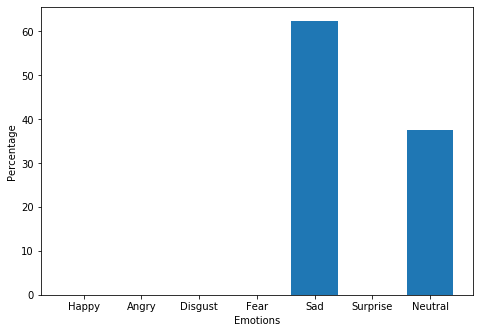

In [7]:
total_emotions=[]
capture=cv2.VideoCapture(0)
while(True):
    check,frame=capture.read()
    cv2.imshow('Frames',frame)
    try:
        crop=facecrop(frame)
        for i in range(len(crop)):
            face=resizeImage(crop[i])
            expression=model.predict_classes(face)
            total_emotions.append(emotion_label[expression[0]])
        key=cv2.waitKey(2000)
        if(key==27):
            break
    except Exception as e:
        print(e)
displayGraph(total_emotions)
capture.release()
cv2.destroyAllWindows()

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


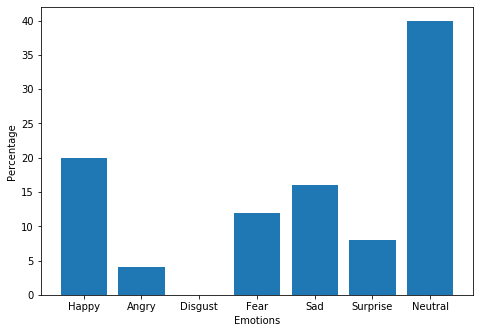

In [8]:
total_emotions=[]
capture=cv2.VideoCapture(0)
while(True):
    check,frame=capture.read()
    cv2.imshow('Frames',frame)
    try:
        crop=facecrop(frame)
        for i in range(len(crop)):
            face=resizeImage(crop[i])
            expression=model.predict_classes(face)
            total_emotions.append(emotion_label[expression[0]])
        key=cv2.waitKey(2000)
        if(key==27):
            break
    except Exception as e:
        print(e)
displayGraph(total_emotions)
capture.release()
cv2.destroyAllWindows()